In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import fft
from numpy import pi
import skimage.io as io
import os

%matplotlib inline

1868.752940784314


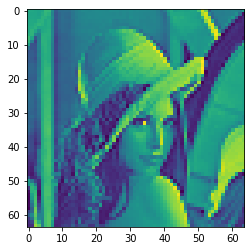

In [2]:
img = io.imread('1.png', as_gray=True)
print(img.sum())
plt.imshow(img)

## 原版FFT

29876.29841406943


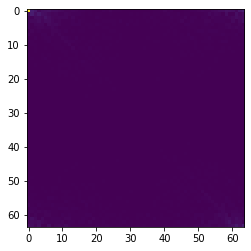

In [3]:
trans = fft.fft2(img.astype('complex128'))
print(abs(trans).sum())
plt.imshow(abs(trans))

1868.7529407843142


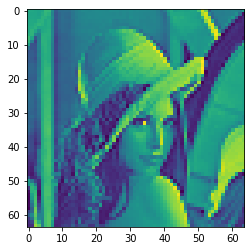

In [4]:
restore = fft.ifft2(trans)
print(np.real(restore).sum())
plt.imshow(np.real(restore))

## 矩阵实现的DFT

In [5]:
def dft_matrix(input_img):
    rows = input_img.shape[0]
    cols = input_img.shape[1]
    t = np.zeros((rows,cols),complex)
    output_img = np.zeros((rows,cols),complex)
    m = np.arange(rows)
    n = np.arange(cols)
    x = m.reshape((rows,1))
    y = n.reshape((cols,1))
    M1 = 1j*np.sin(-2*np.pi*y*n/rows) + np.cos(-2*np.pi*y*n/rows)
    M2 = 1j*np.sin(-2*np.pi*x*m/cols) + np.cos(-2*np.pi*x*m/cols)
    for row in range(0,rows):
        t[row] = np.dot(M1, input_img[row])
    for col in range(0,cols):
        output_img[:,col] = np.dot(M2, t[:,col])
    return output_img

In [6]:
def idft_matrix(input_img):
    rows = input_img.shape[0]
    cols = input_img.shape[1]
    t = np.zeros((rows,cols),complex)
    output_img = np.zeros((rows,cols),complex)
    m = np.arange(rows)
    n = np.arange(cols)
    x = m.reshape((rows,1))
    y = n.reshape((cols,1))
    M1 = 1j*np.sin(2*np.pi*y*n/rows) + np.cos(2*np.pi*y*n/rows)
    M2 = 1j*np.sin(2*np.pi*x*m/cols) + np.cos(2*np.pi*x*m/cols)
    for row in range(0,rows):
        t[row] = np.dot(M1, input_img[row]) / rows
    for col in range(0,cols):
        output_img[:,col] = np.dot(M2, t[:,col]) / cols
    return output_img

29876.298414069428


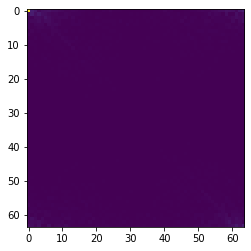

In [7]:
dft_trans = dft_matrix(img)
print(abs(dft_trans).sum())
plt.imshow(abs(dft_trans))

1868.7529407843135


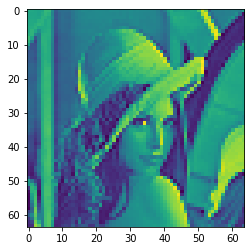

In [8]:
dft_restore = idft_matrix(dft_trans)
print(np.real(dft_restore).sum())
plt.imshow(np.real(dft_restore))